# Import Library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# memeriksa bentuk (shape) dari data pelatihan dan data pengujian dalam dataset MNIST
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [5]:
# memeriksa bentuk (shape) dari label pelatihan dan label pengujian dalam dataset MNIST
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [6]:
# memeriksa bentuk data --> bentuk data haruslah 28*28
train_data[0].shape

(28, 28)

In [7]:
# Check the label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [8]:
# menggabungkan data pelatihan dan pengujian dari dataset MNIST ke dalam dua array baru.
#  menggabungkan (stack) array train_data dan test_data secara vertikal.
digits_data = np.vstack([train_data, test_data])
# menggabungkan (stack) array train_labels dan test_labels secara horizontal.
digits_labels = np.hstack([train_labels, test_labels])

In [9]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [10]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 2')

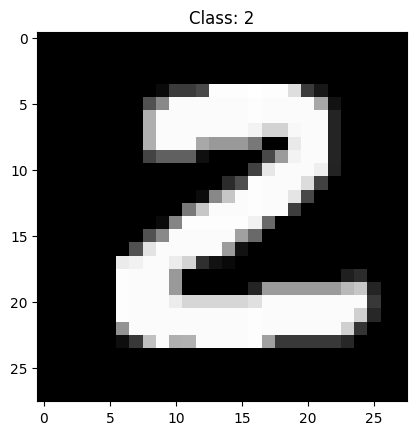

In [11]:
# Randomly checking the data
# menggunakan np.random.randint untuk menghasilkan indeks acak antara 0 dan jumlah total sampel dalam digits_data.
idx = np.random.randint(0, digits_data.shape[0])
# menampilkan gambar yang sesuai dengan indeks acak (idx) dari digits_data.
# Parameter cmap='gray' menentukan bahwa gambar harus ditampilkan dalam skala abu-abu.
plt.imshow(digits_data[idx], cmap='gray')
# menambahkan judul ke plot dengan menampilkan label yang sesuai dengan indeks acak (idx) dari digits_labels.
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

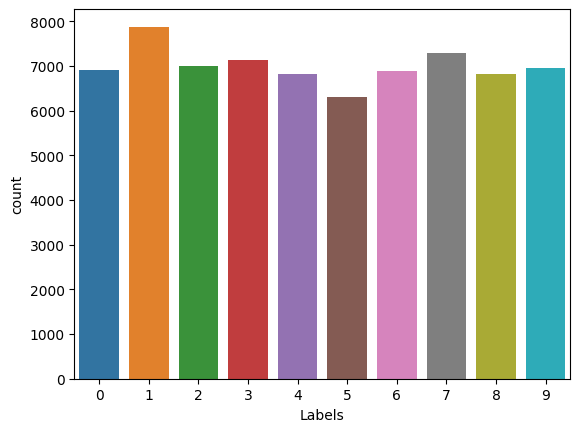

In [12]:
# Check data distribution
# membuat DataFrame pandas (df_labels) dari array digits_labels. 
# DataFrame ini akan digunakan untuk melakukan visualisasi distribusi label.
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
# menggunakan fungsi sns.countplot dari seaborn untuk membuat plot batang yang menunjukkan frekuensi masing-masing label dalam dataset. 
# Parameter x='Labels' menunjukkan bahwa sumbu horizontal akan berisi label dari dataset.
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-11-28 04:20:05--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  77.6MB/s    in 2.4s    

2023-11-28 04:20:07 (77.6 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Extract zip file
# Objek zip dibuat untuk file 'alfabeto_A-Z.zip' dalam mode membaca ('r').
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
# menggunakan metode extractall pada objek zip untuk mengekstrak semua file dan folder yang ada dalam zip ke direktori saat ini ('./').
zip_object.extractall('./')
# menutup objek zip setelah selesai mengekstrak isi file. Ini adalah praktik yang baik untuk memastikan sumber daya dibebaskan setelah digunakan.
zip_object.close()

In [15]:
# menggunakan fungsi pd.read_csv dari pandas untuk membaca data dari file CSV dengan nama 'A_Z Handwritten Data.csv'.
# .astype('float32'): Mengubah tipe data semua kolom dalam dataset menjadi tipe data float32. 
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# variabel yang menampung dataset yang telah dibaca dan diubah tipe datanya.
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Get pixel data only
# menggunakan metode drop pada DataFrame dataset_az untuk menghapus kolom dengan nama '0'.
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
# mengambil kolom dengan nama '0' dari DataFrame dataset_az dan menempatkannya dalam variabel alphabet_labels. 
alphabet_labels = dataset_az['0']

In [17]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [18]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [19]:
# Reshape pixel data to 28*28
# menggunakan fungsi np.reshape untuk mengubah bentuk array menjadi matriks 28x28 piksel.
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# digunakan untuk memeriksa bentuk (shape) dari alphabet_data setelah perubahan bentuk.
alphabet_data.shape

(372450, 28, 28)

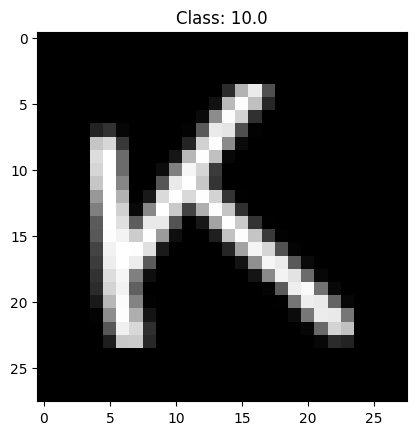

In [20]:
# Randomly checking A-Z dataset
# # menggunakan np.random.randint untuk menghasilkan indeks acak antara 0 dan jumlah total sampel dalam digits_data.
index = np.random.randint(0, alphabet_data.shape[0])
# menampilkan gambar yang sesuai dengan indeks acak (idx) dari digits_data.
# Parameter cmap='gray' menentukan bahwa gambar harus ditampilkan dalam skala abu-abu.
plt.imshow(alphabet_data[index], cmap = 'gray')
# menambahkan judul ke plot dengan menampilkan label yang sesuai dengan indeks acak (idx) dari digits_labels.
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

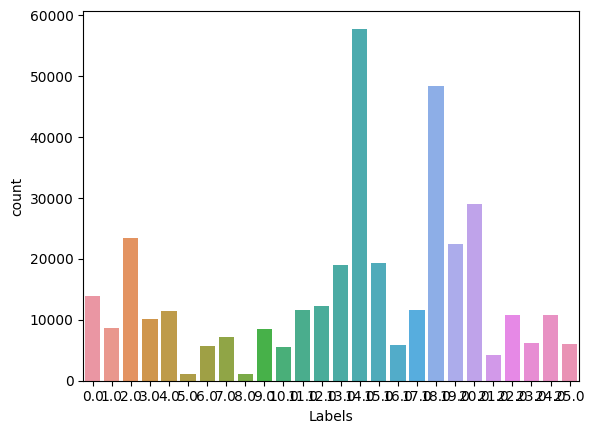

In [21]:
# Check data distribution
# membuat DataFrame pandas (df_az_labels) dari array alphabet_labels. 
# DataFrame ini akan digunakan untuk melakukan visualisasi distribusi label.
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
# menggunakan fungsi sns.countplot dari seaborn untuk membuat plot batang yang menunjukkan frekuensi masing-masing label dalam dataset. 
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [22]:
# memeriksa nilai yang unik dari digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# memeriksa nilai yang unik dari alpabhet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [25]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# Combine both of them
# mengkombinasikan kedua data dan kedua label
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [27]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [28]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data to float32
# melakukan konvesi data menjadi float32
data = np.array(data, dtype = 'float32')

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [31]:
# Normalize data
data /= 255.0

In [32]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [34]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

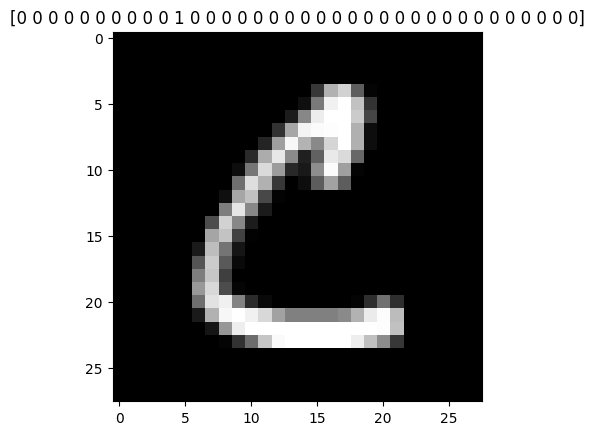

In [35]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Check the biggest value of data
classes_total.max()

57825

In [38]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [40]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
# ImageDataGenerator: kelas dari Keras yang menyediakan fungsionalitas augmentasi data gambar. 
# rotation_range=10: Menentukan rentang rotasi dalam derajat.
# zoom_range=0.05: Menentukan rentang zoom. 
# width_shift_range=0.1: Menentukan rentang pergeseran lebar (horizontal). 
# height_shift_range=0.1: Menentukan rentang pergeseran tinggi (vertikal). 
# horizontal_flip=False: Menentukan apakah akan melakukan flip horizontal pada gambar.
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [42]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# Build the network
# membuat objek model sequential
network = Sequential()

# Menambahkan lapisan konvolusi dengan 32 filter, kernel ukuran 3x3, fungsi aktivasi ReLU, dan input shape (bentuk masukan) sebesar (28, 28, 1).
network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Menambahkan lapisan pooling maksimum (max pooling) dengan ukuran pool 2x2.
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi dengan 64 filter, kernel ukuran 3x3, fungsi aktivasi ReLU, dan input shape (bentuk masukan) sebesar (28, 28, 1).
network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
# Menambahkan lapisan pooling maksimum (max pooling) dengan ukuran pool 2x2.
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi dengan 128 filter, kernel ukuran 3x3, fungsi aktivasi ReLU, dan input shape (bentuk masukan) sebesar (28, 28, 1).
network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
# Menambahkan lapisan pooling maksimum (max pooling) dengan ukuran pool 2x2.
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan flatten untuk meratakan output dari lapisan konvolusi sebelumnya menjadi vektor satu dimensi.
network.add(Flatten())

# Menambahkan lapisan dense dengan 64, 128 dan 36 unit dan fungsi aktivasi softmax.
network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

# Mengompilasi model dengan menggunakan fungsi loss 'categorical_crossentropy' (cocok untuk klasifikasi multikelas), 
# optimizer 'adam', dan mengukur metrik akurasi selama pelatihan.
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [45]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [46]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [47]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [48]:
# Fit the model
# Menggunakan generator augmentasi augmentation.flow untuk menghasilkan batch augmentasi dari data pelatihan (X_train dan y_train).
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      # Menggunakan data validasi yang tidak diubah (tanpa augmentasi) untuk mengukur kinerja model pada data yang tidak dilihat selama pelatihan.
                      validation_data = (X_test, y_test),
                      # Menentukan jumlah langkah (steps) yang akan diambil dalam setiap epoch (siklus melalui seluruh data pelatihan).
                      # Menentukan jumlah epoch (siklus melalui seluruh dataset pelatihan) yang akan digunakan dalam pelatihan.
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      # Memberikan bobot kelas (class weights) untuk menangani ketidakseimbangan kelas dalam data.
                      # Menentukan tingkat verbositas (keberisian) selama pelatihan.
                      # Menggunakan callback checkpointer yang mungkin telah didefinisikan sebelumnya.
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2083 - accuracy: 0.8241
Epoch 1: val_loss improved from inf to 0.24888, saving model to custom_ocr.model
2765/2765 [==============================] - 127s 42ms/step - loss: 2.2083 - accuracy: 0.8241 - val_loss: 0.2489 - val_accuracy: 0.8956
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.9761 - accuracy: 0.9010
Epoch 2: val_loss improved from 0.24888 to 0.23175, saving model to custom_ocr.model
2765/2765 [==============================] - 120s 43ms/step - loss: 0.9760 - accuracy: 0.9011 - val_loss: 0.2318 - val_accuracy: 0.9077
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8250 - accuracy: 0.9127
Epoch 3: val_loss did not improve from 0.23175
2765/2765 [==============================] - 115s 42ms/step - loss: 0.8250 - accuracy: 0.9127 - val_loss: 0.2369 - val_accuracy: 0.9036
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7241 - accu

# Evaluate Model

## Make a Single Prediction

In [49]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [50]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([1.7025598e-26, 3.3884881e-12, 1.7296869e-12, 1.5259327e-25,
       1.2389498e-14, 4.5684574e-16, 2.6026036e-22, 9.2796237e-15,
       7.2687508e-16, 7.4336235e-19, 5.9014532e-17, 6.1279716e-19,
       6.5988144e-15, 1.1362646e-15, 5.4519557e-18, 3.1715010e-15,
       1.9505316e-15, 2.4291708e-15, 9.9999964e-01, 3.8414791e-07,
       4.4179758e-14, 3.1837094e-10, 2.4126214e-23, 1.5397032e-17,
       3.3651304e-14, 1.1494852e-19, 1.4639307e-17, 4.4492665e-17,
       1.2087190e-12, 9.2450962e-09, 9.1217967e-14, 1.3572893e-20,
       1.8258438e-16, 1.4167743e-11, 1.0936565e-15, 8.9349334e-13],
      dtype=float32)

In [51]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [52]:
# Check label for 24
name_labels[18]

'I'

In [53]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# check the highest value
np.argmax(y_test[1])

18

In [55]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [56]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1198 - accuracy: 0.9615


[0.11981930583715439, 0.9614645838737488]

In [57]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.49      0.32      0.39      1381
           1       0.98      0.99      0.98      1575
           2       0.95      0.95      0.95      1398
           3       0.99      0.98      0.98      1428
           4       0.96      0.93      0.95      1365
           5       0.72      0.92      0.81      1263
           6       0.97      0.97      0.97      1375
           7       0.98      0.98      0.98      1459
           8       0.97      0.99      0.98      1365
           9       0.97      0.98      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.99      0.99      1734
           C       0.99      0.99      0.99      4682
           D       0.90      0.96      0.93      2027
           E       0.99      0.99      0.99      2288
           F       0.96      1.00      0.98       233
           G       0.96      0.96      0.96      1152
           H       0.96    

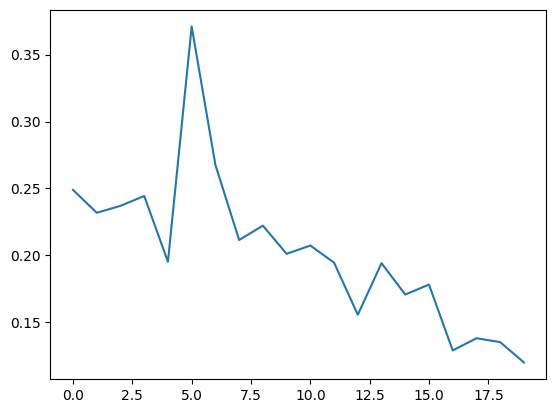

In [58]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [59]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

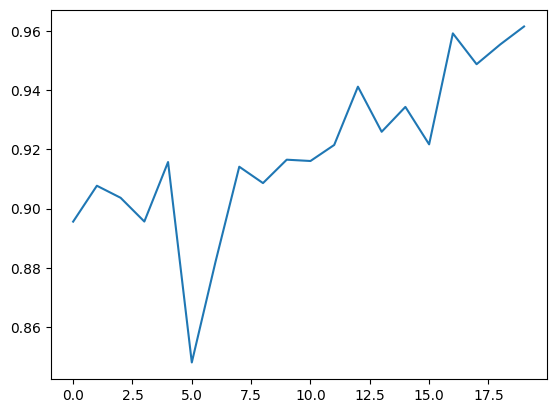

In [60]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# Save The Model

In [61]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [62]:
# Import library
from tensorflow.keras.models import load_model

In [63]:
# Load saved network
load_network = load_model('network')

In [64]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

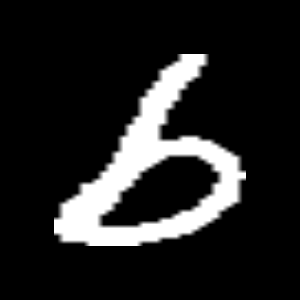

In [65]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [66]:
# Check shape
img.shape

(300, 300, 3)

In [67]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

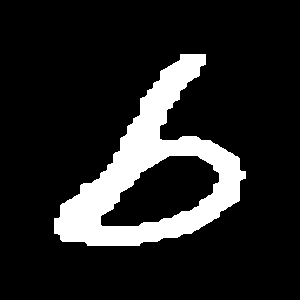

120.0


In [68]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [69]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [70]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [71]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [72]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 159ms/step


6

In [73]:
# check label for 6
name_labels[6]

'6'

## **SIMPULAN**

Kode program diatas digunakan untuk melakukan pengolahan data dan pembuatan moden CNN. Pengolahan dataset MNIST dan Kaggle A-Z menghasilkan model CNN. Model CNN selanjutnya akan dilatih dengan memisahkan data train dan data test. Setelah itu model akan dievaluasi dan disimpan untuk penggunaan selanjutnya.
Hasil model yang telah dievaluasi akan diujikan pada gambar sebenarnya (gambar yang tidak ada pada dataset). 

Hasil dari uji model dengan gambar huruf b tersebut menghasilkan nilai prediksi (6) sesuai dengan label ke-6 dalam daftar 'name_labels' yang merupakan huruf "G"

Dengan demikian, dapat dilihat bahwa gambar 'b_small.png' yang telah diubah ukurannya diinterpretasikan oleh model sebagai huruf "G" dan label prediksi adalah 6.